In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
url="https://github.com/ageron/handson-ml2/tree/master/"
path=os.path.join('datasets', 'housing')
housing_url=url+'datasets/housing/housing.tgz'

#Data Extraction function for tgz format

def fetch_housing_data(housing_url=housing_url, housing_path=path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    


In [3]:
# Data loading function for csv formate

def load_housing_data(housing_path=path):
    csv_path = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
    return pd.read_csv(csv_path)

housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing['housing_median_age'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2111.0     1
1852.0     1
1663.0     1
1652.0     1
2479.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


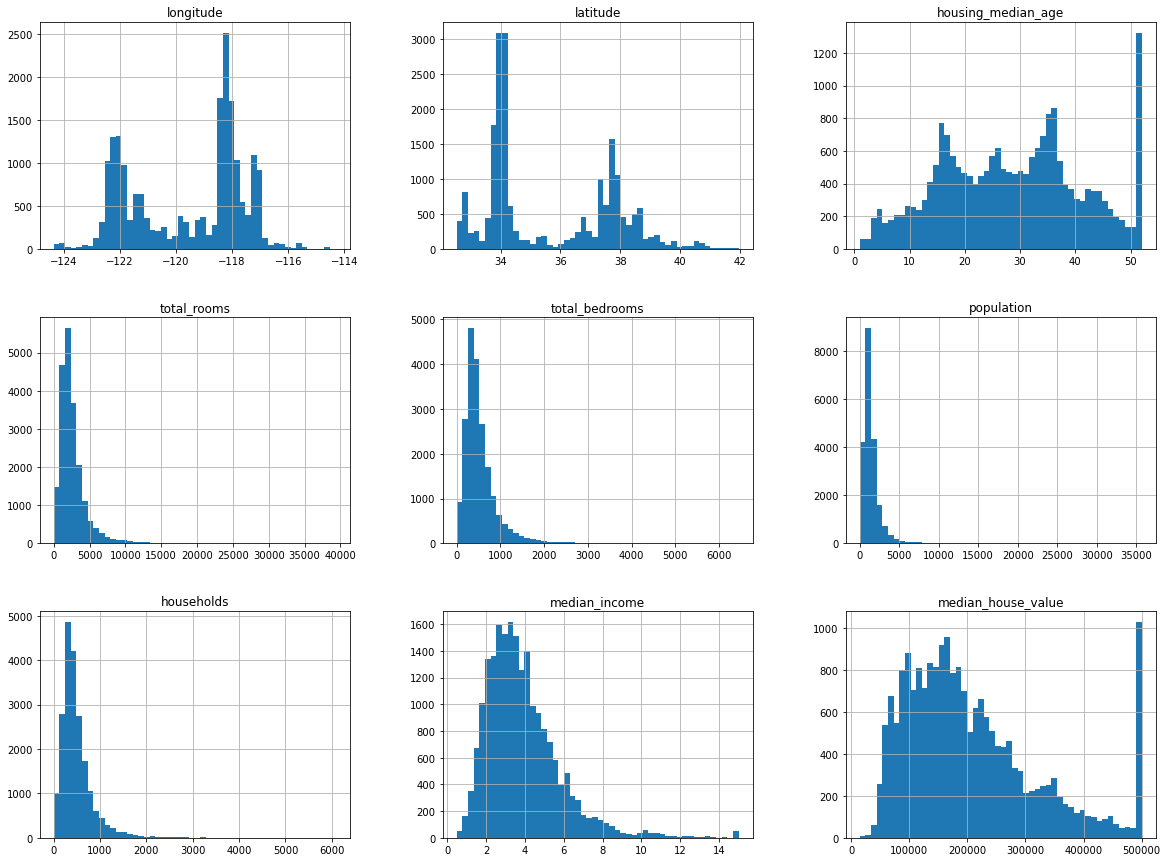

In [10]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
def train_test_split(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_size]
    train_indices=shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set=train_test_split(housing, 0.2)
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


<AxesSubplot:>

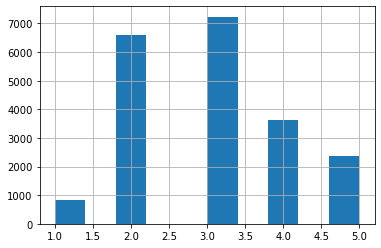

In [12]:
housing['income_cat']=pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [14]:
# remove the income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights


In [15]:
housing=strat_train_set.copy()


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

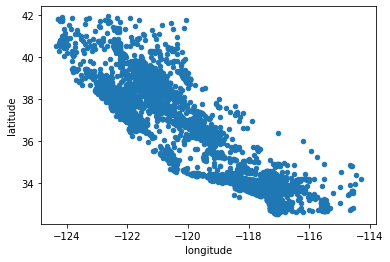

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

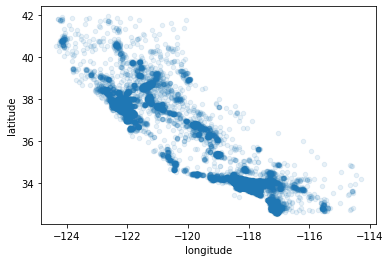

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

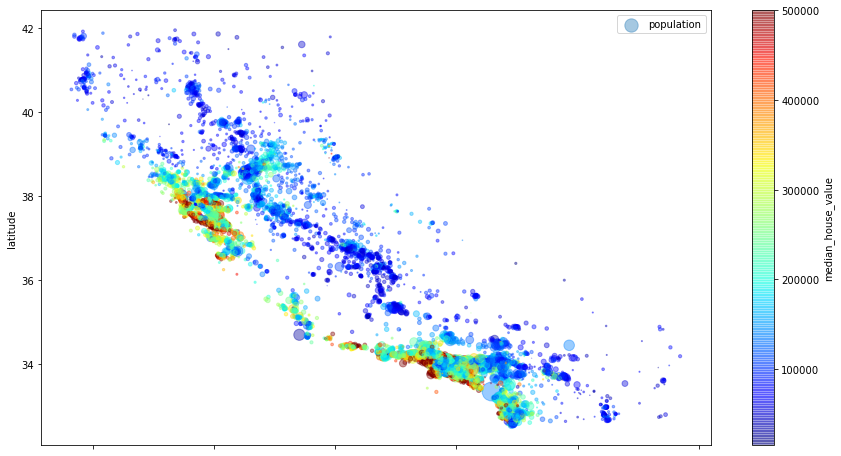

In [18]:
# median_house_value
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100, label='population', figsize=(15, 8),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

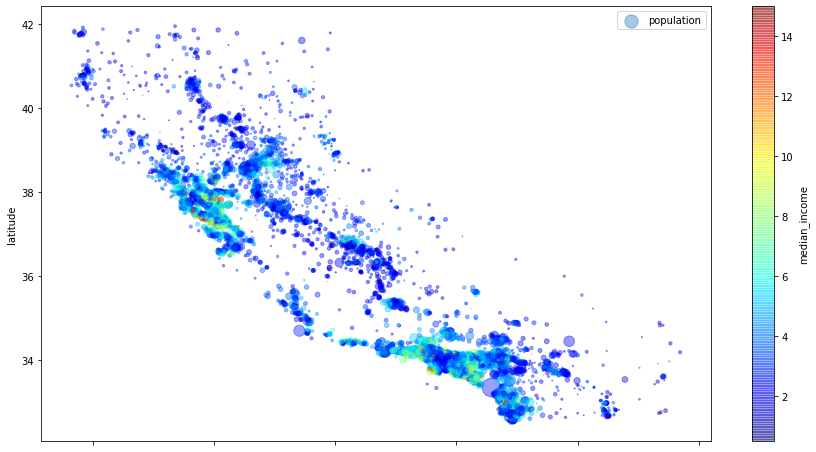

In [19]:
#median_income
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100, label='population', figsize=(15, 8), 
            c='median_income', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [20]:
# Looking for correlations
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [21]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

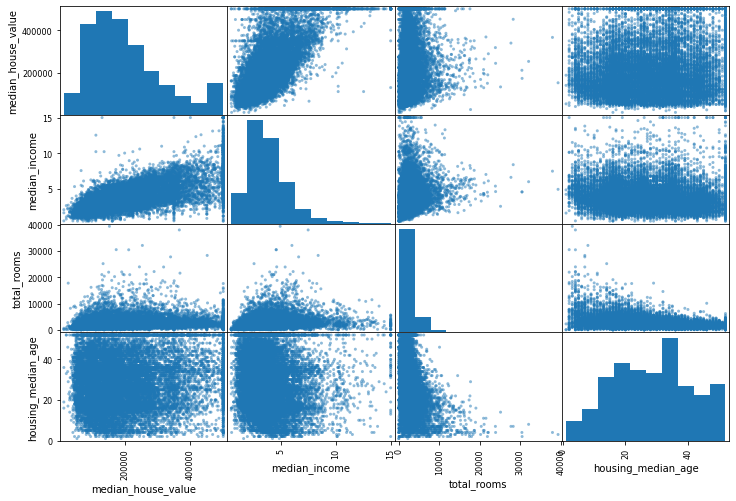

In [22]:
from pandas.plotting import scatter_matrix
features=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[features], figsize=(12, 8))

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

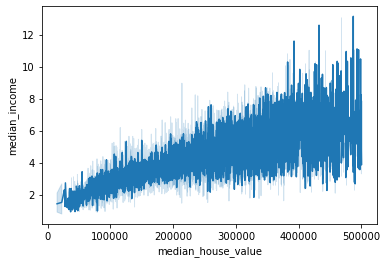

In [23]:
import seaborn as sns
sns.lineplot(data=housing, x='median_house_value', y='median_income')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

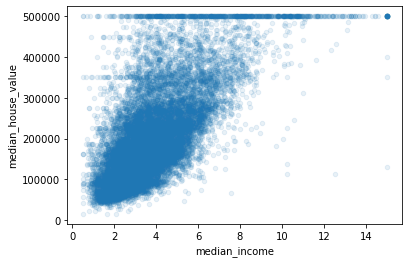

In [24]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [25]:
# feature engineering
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [26]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [27]:
# Preparing the data for machine learning algorithms
housing=strat_train_set.drop('median_house_value', axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [29]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

# Data cleaning


In [30]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [31]:
# options:
"""
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
"""

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

# median can be computed only with numerican arribtues. so drop the ocean_proximity
housing_num=housing.drop(['ocean_proximity'], axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


# Dealing with Text and Categorical Features


In [34]:
housing_cat=housing['ocean_proximity']
housing_cat=pd.DataFrame(housing_cat)
housing_cat=housing_cat.values.reshape(-1, 1)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [36]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
# it is better to create one code for each category by OneHot Ecnoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix=3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household=X[:, rooms_ix]/X[:, households_ix]
        population_per_household=X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)
        
        

# Feature Scaling and Transformation Pipelines

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_add', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [43]:
# Applying all transformation to the housing data together
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [44]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Training Models
 

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
# Let’s try it out on a few instances from the training set:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print('Prediction:', lin_reg.predict(some_data_prepared))

Prediction: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [47]:
print('labels: ', list(some_labels))

labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [48]:
# Let's measure its RMSE
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_prediction)
lin_rmse=np.sqrt(lin_mse)

print('MSE: ', lin_mse)
print('RMSE: ', lin_rmse)

MSE:  4709829587.971121
RMSE:  68628.19819848923


This is better than nothing, but clearly not a great score: most districts’ median_hous
ing_values range between $120,000-and-$265,000, so a typical prediction error of
$68,628 is not very satisfying. This is an example of a model underfitting the training
data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [50]:
# Let's evaluate it now. 
housing_prediction=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels, housing_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_mse

0.0

In [52]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(tree_rmse_scores)

Scores:  [68312.01492392 65636.90683532 71476.70247719 69741.56276064
 70511.97735317 73433.95614099 70279.09335707 69812.55265854
 76201.57508046 70271.61486006]
Mean:  70567.79564473452
Standard Deviation:  2676.0028019178903


In [55]:
# Let's compare it with linear regression result
lin_scores=cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798348


In [56]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49592.04875344 47596.42596306 50092.2037467  52064.2170501
 49680.13960914 53279.42473877 48768.5966834  47479.06807249
 53177.77242211 50036.37649839]
Mean:  50176.6273537579
Standard Deviation:  1967.9701147364997


# Fine-Tune your model

In [59]:
# GridSearch

from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3, 10, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10, 40, 50, 60, 70, 80, 90, 100], 'max_features':[2, 3, 4]},
]

forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


{'bootstrap': False, 'max_features': 4, 'n_estimators': 80}
RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=80)


In [60]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63945.854972751775 {'max_features': 2, 'n_estimators': 3}
55354.571958635315 {'max_features': 2, 'n_estimators': 10}
53250.22064688421 {'max_features': 2, 'n_estimators': 30}
52748.47188714306 {'max_features': 2, 'n_estimators': 40}
52451.05196306542 {'max_features': 2, 'n_estimators': 50}
52320.13702990412 {'max_features': 2, 'n_estimators': 60}
52146.25479638325 {'max_features': 2, 'n_estimators': 70}
52006.946063342395 {'max_features': 2, 'n_estimators': 80}
52006.537869383945 {'max_features': 2, 'n_estimators': 90}
51906.56680134675 {'max_features': 2, 'n_estimators': 100}
60416.93146806105 {'max_features': 4, 'n_estimators': 3}
52681.381401229446 {'max_features': 4, 'n_estimators': 10}
50654.37484417484 {'max_features': 4, 'n_estimators': 30}
49855.65755804831 {'max_features': 4, 'n_estimators': 40}
50135.135170409274 {'max_features': 4, 'n_estimators': 50}
49757.370764890955 {'max_features': 4, 'n_estimators': 60}
49742.38473755304 {'max_features': 4, 'n_estimators': 70}
49737.23

In [66]:

forest_reg=RandomForestRegressor(n_estimators=100, max_features=8)
forest_reg.fit(housing_prepared, housing_labels)

forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [48881.4090529  46334.06444154 48897.56357404 50639.73177614
 48429.70994039 52703.75070407 47518.05807536 46986.25264405
 51415.74031564 48825.18766271]
Mean:  49063.146818685964
Standard Deviation:  1895.8192283019375


# Ensemble Methods


In [67]:
# Analyze the best models and their errors
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([9.16538172e-02, 8.01131429e-02, 4.16210765e-02, 2.19871526e-02,
       1.92106171e-02, 2.20248421e-02, 1.94761714e-02, 2.74815970e-01,
       7.25805846e-02, 9.96367485e-02, 8.28724089e-02, 2.04679202e-02,
       1.38236330e-01, 5.10376789e-05, 6.86691946e-03, 8.38526091e-03])

In [69]:
# Let's display the scores with their corresponding attribute names:
extra_attribs=['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs + extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.27481596975228906, 'median_income'),
 (0.13823633014333814, 'INLAND'),
 (0.09963674851742602, 'pop_per_hhold'),
 (0.09165381720067606, 'longitude'),
 (0.08287240888422347, 'bedrooms_per_room'),
 (0.08011314293287969, 'latitude'),
 (0.07258058457351473, 'rooms_per_hhold'),
 (0.0416210765356715, 'housing_median_age'),
 (0.02202484211042879, 'population'),
 (0.021987152585962587, 'total_rooms'),
 (0.02046792024000331, '<1H OCEAN'),
 (0.019476171385975165, 'households'),
 (0.019210617094968734, 'total_bedrooms'),
 (0.008385260907066667, 'NEAR OCEAN'),
 (0.006866919456716099, 'NEAR BAY'),
 (5.103767885999626e-05, 'ISLAND')]

In [72]:
# let's evalute the model on the test set
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop('median_house_value', axis=1)
y_test=strat_test_set['median_house_value'].copy()
x_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(x_test_prepared)

final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

print('MSE: ', final_mse)
print('RMSE: ', final_rmse)

MSE:  2162536344.4281325
RMSE:  46503.078870416015


In [73]:
# Finding the precise estimation
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([44541.93663613, 48384.79688455])